In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('boston.csv')

In [4]:
corr = df.corr()

In [6]:
corr['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

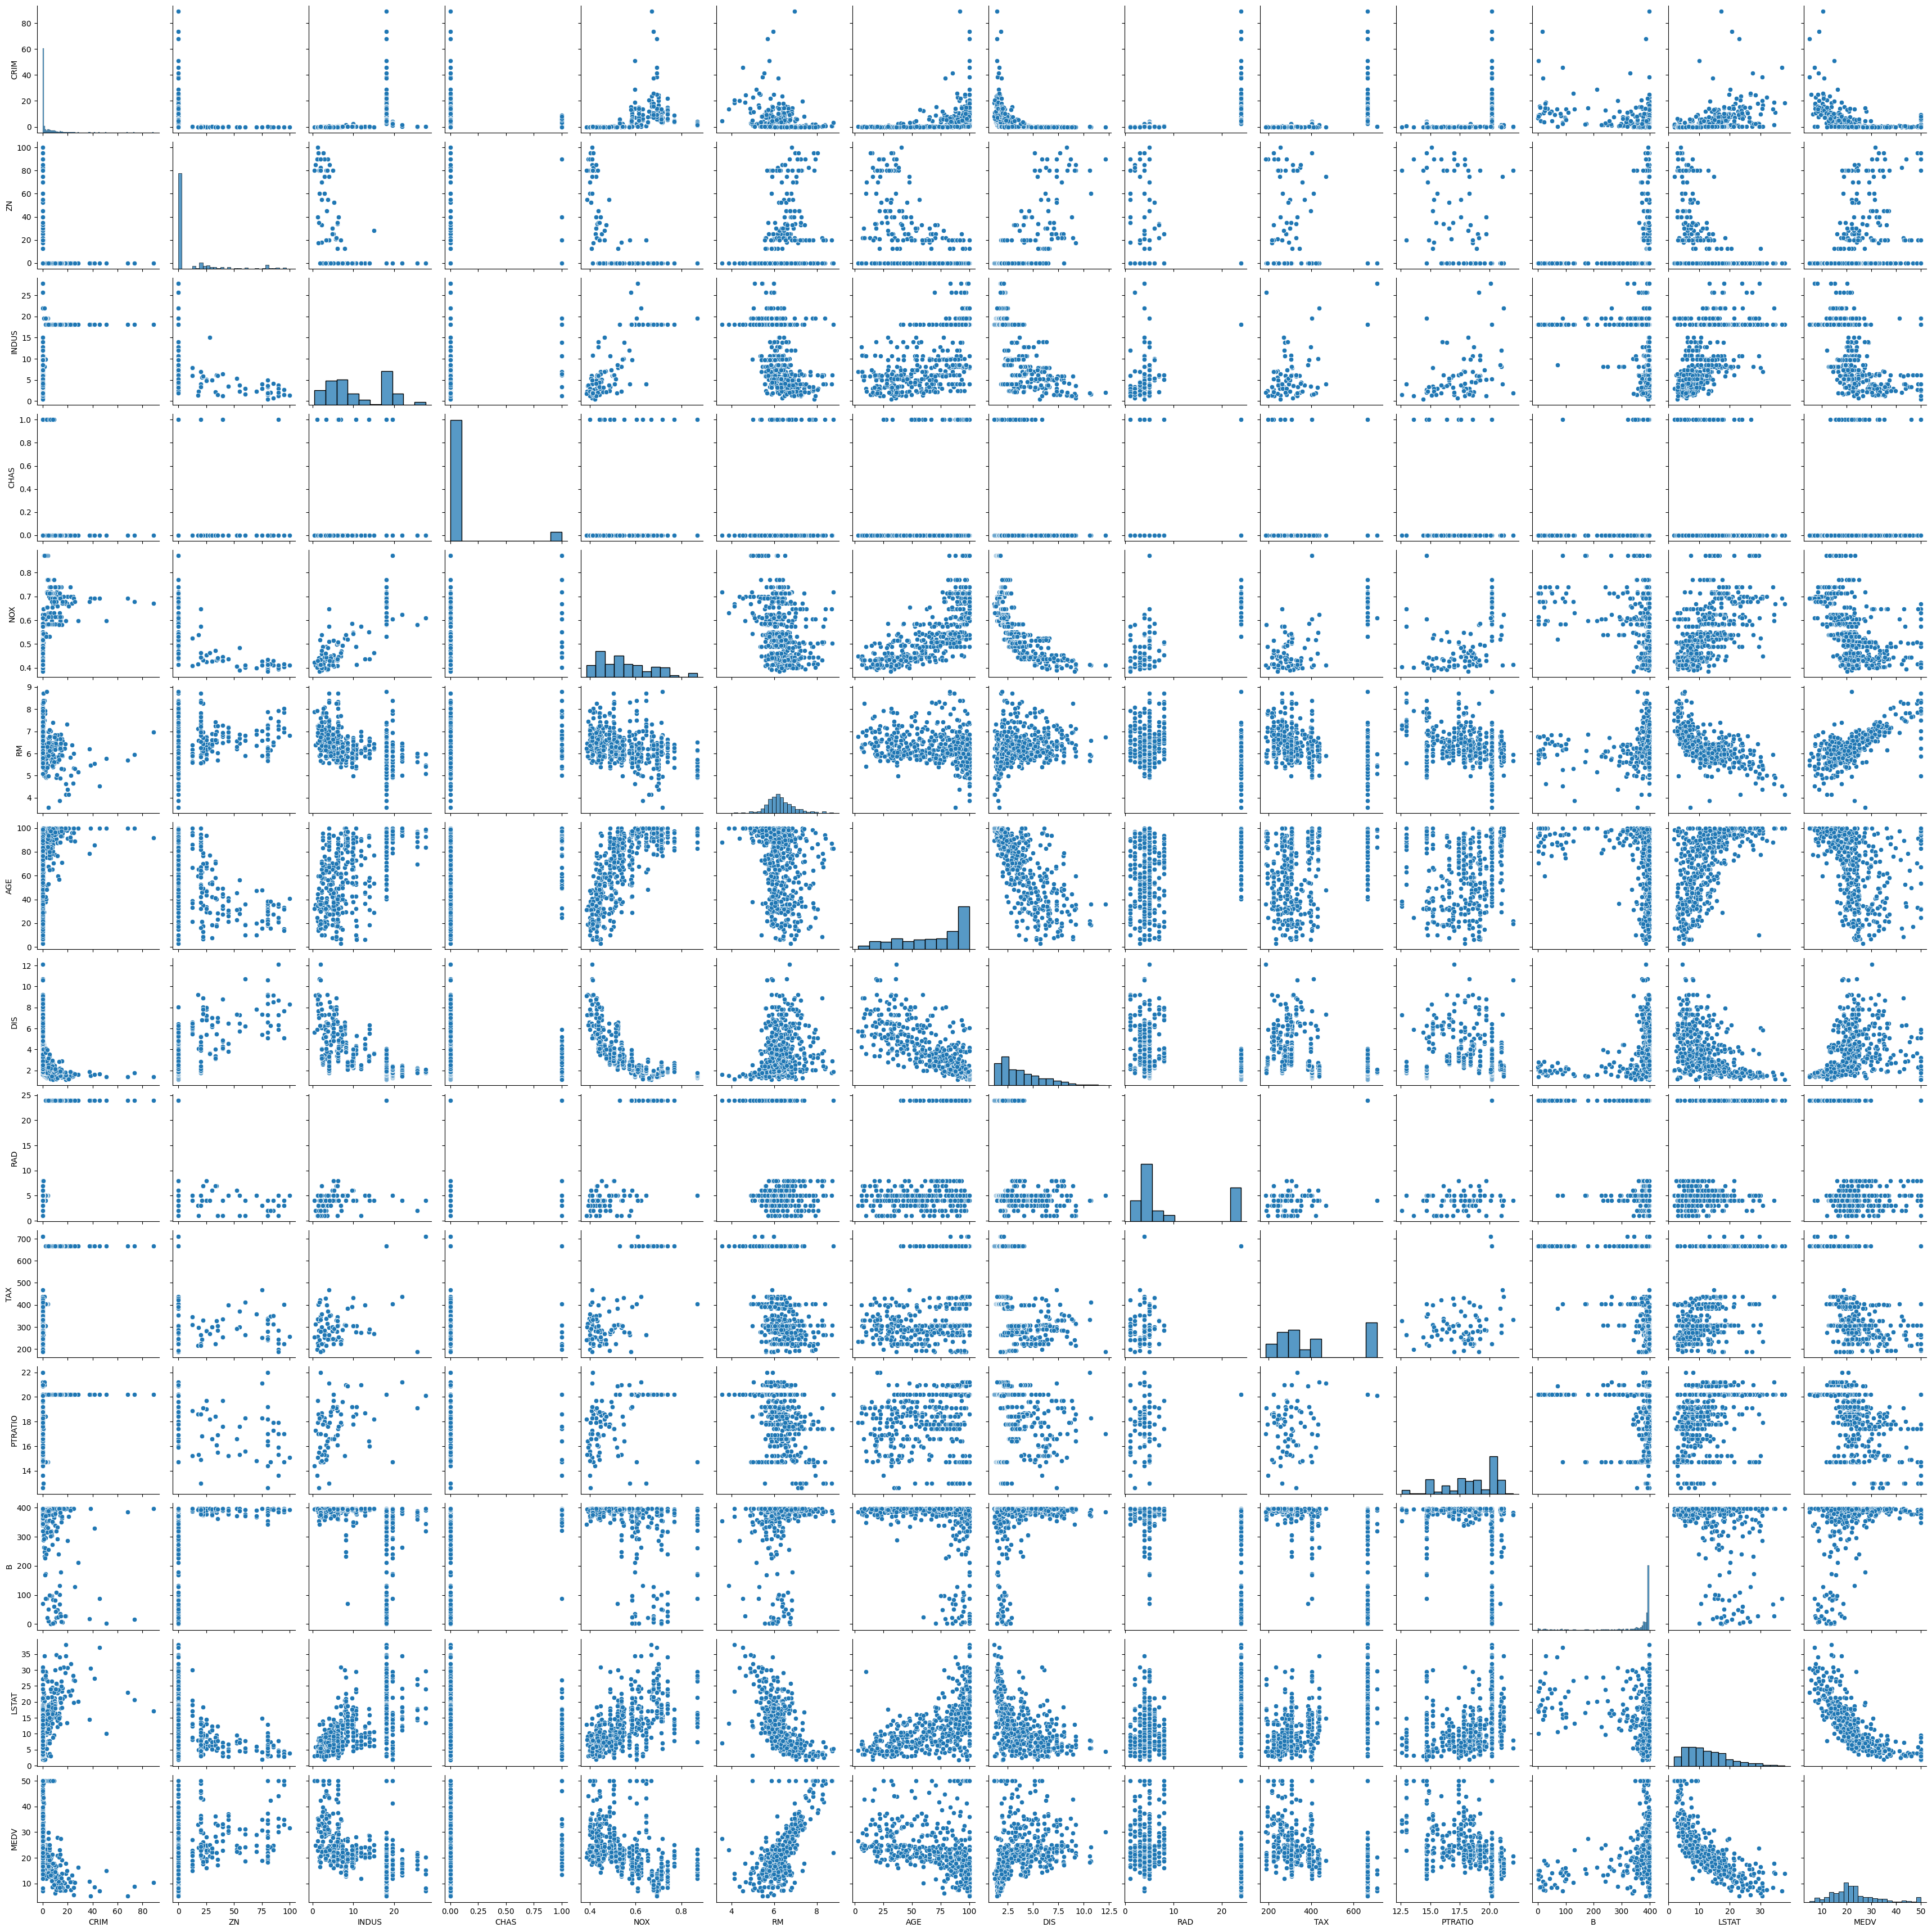

In [7]:
sns.pairplot(df)

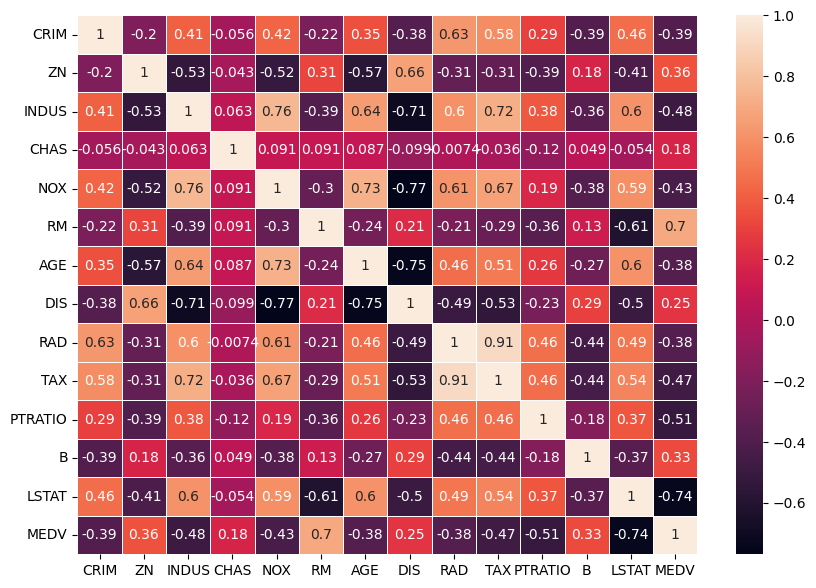

In [13]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True, linewidths=0.5)
plt.show()

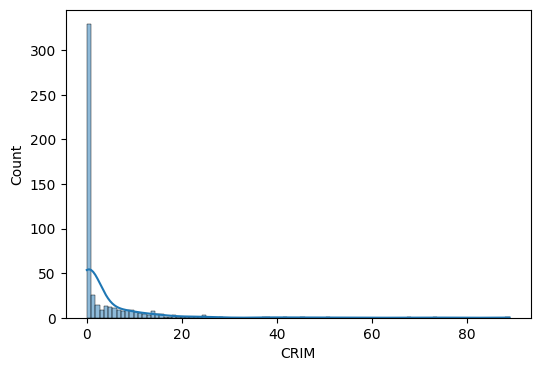

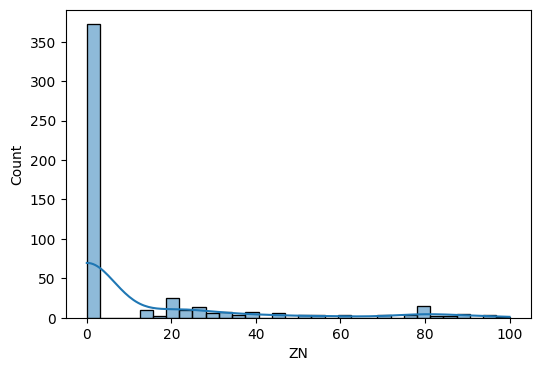

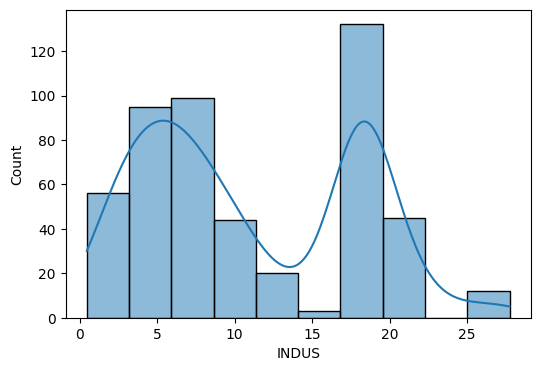

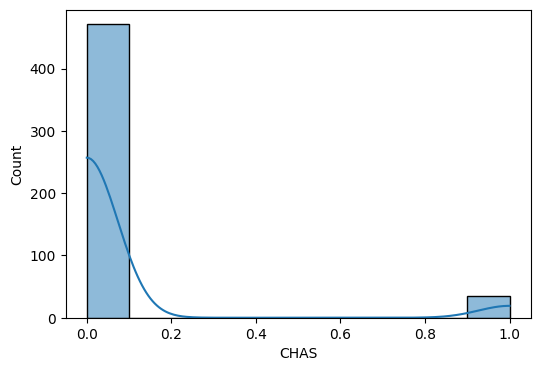

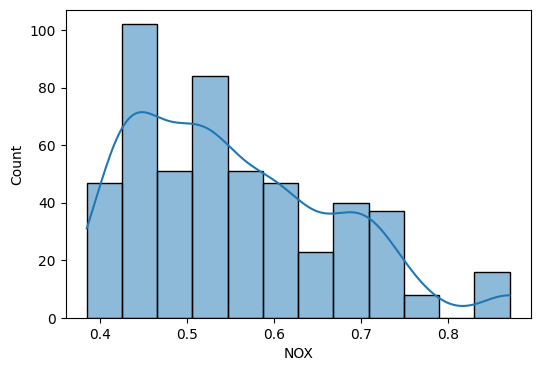

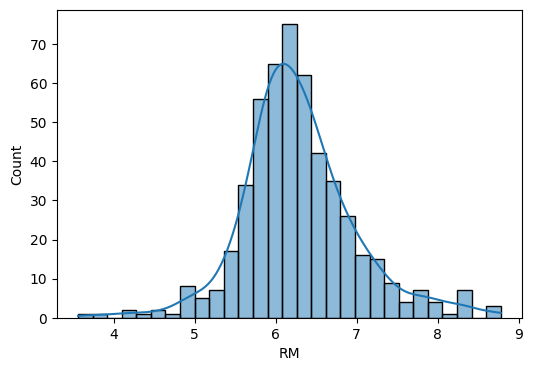

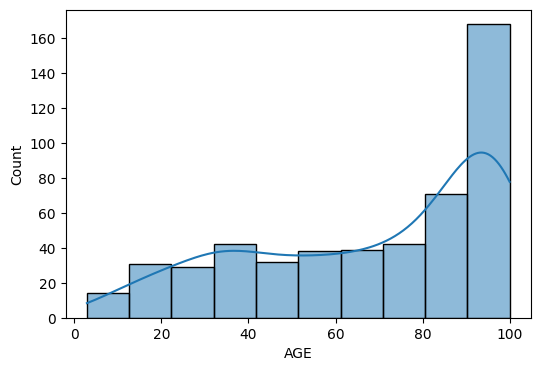

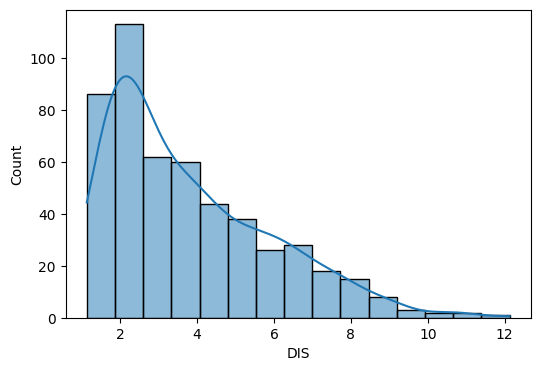

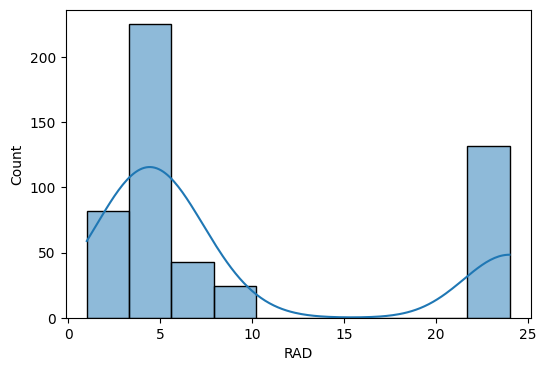

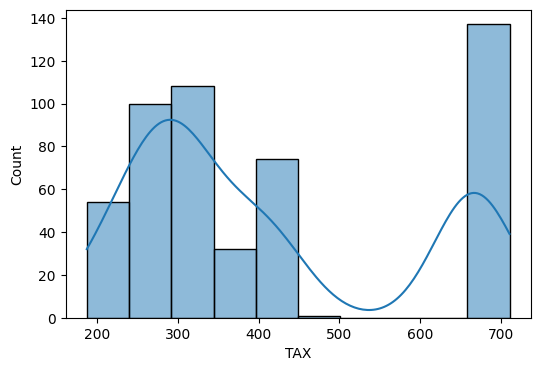

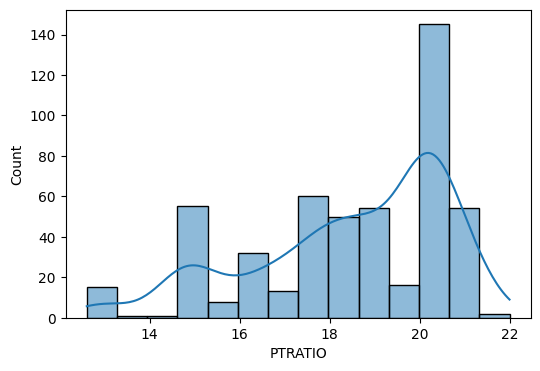

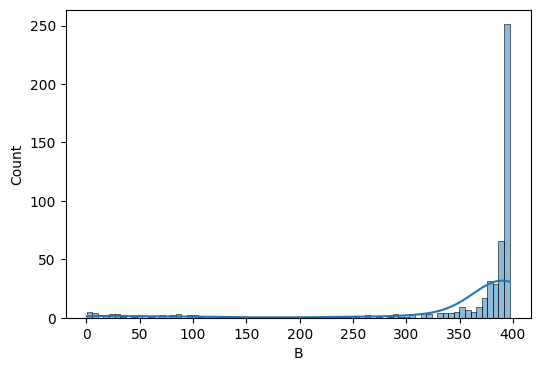

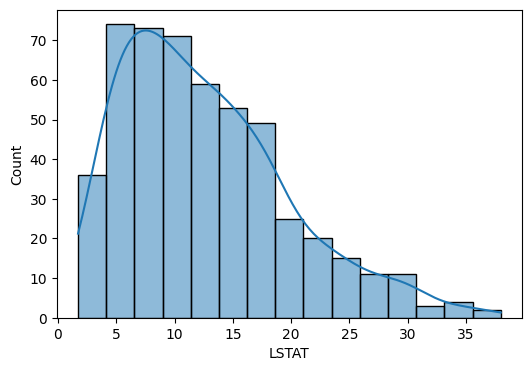

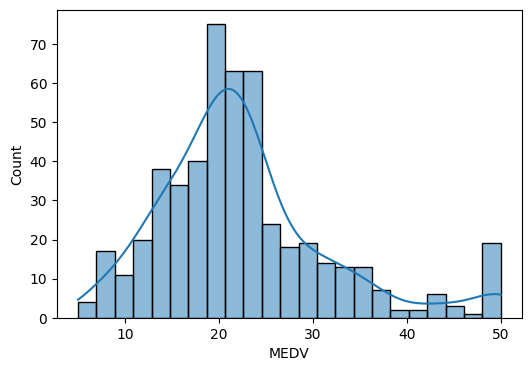

In [16]:
for cols in df.columns:
    plt.figure(figsize=(6,4))
    sns.histplot(data=df, x=df[cols], kde=True)
    plt.show()

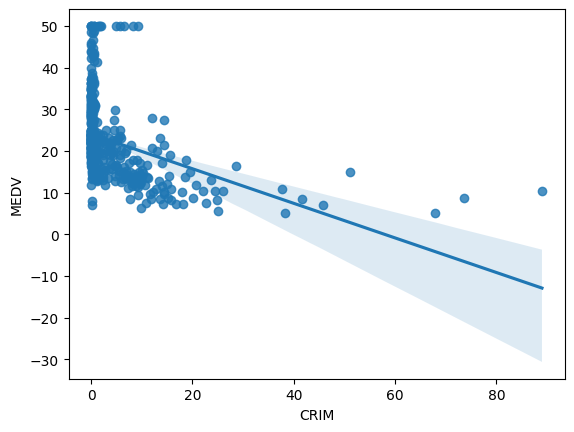

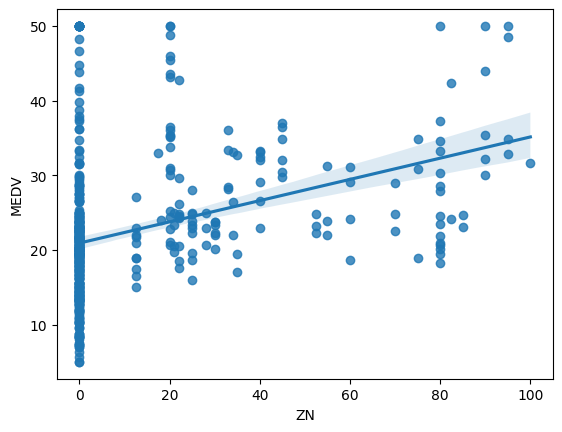

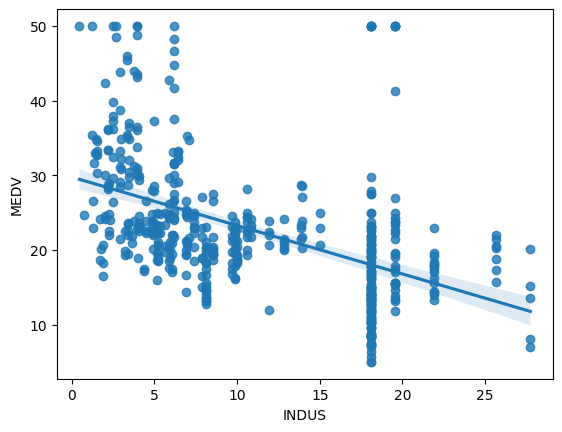

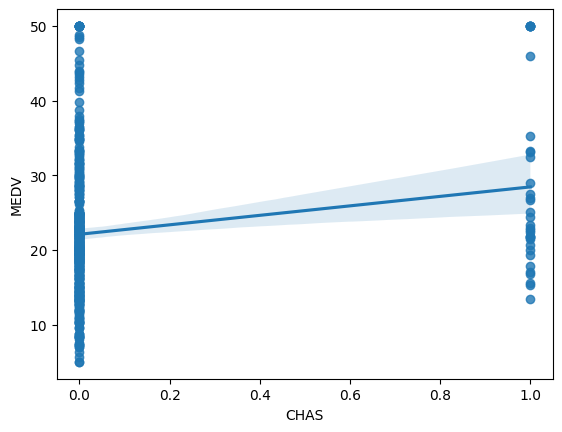

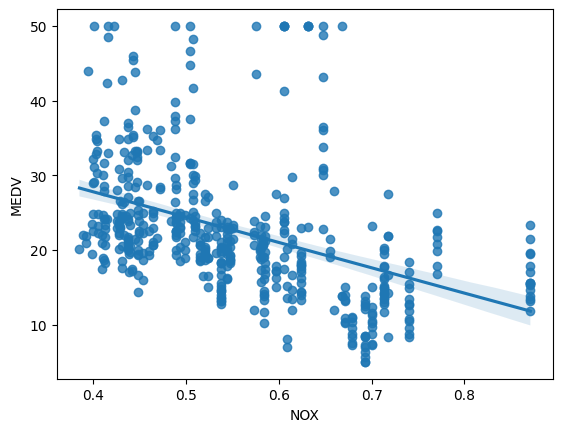

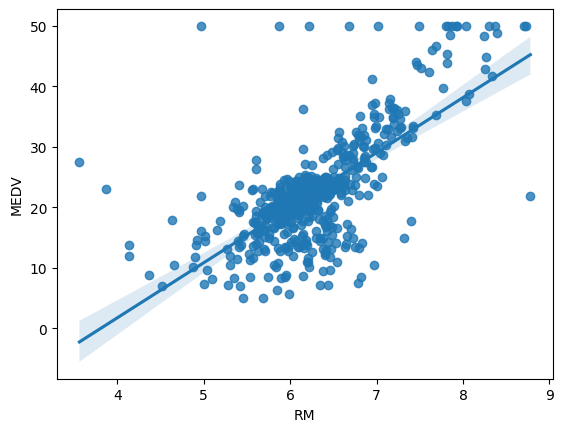

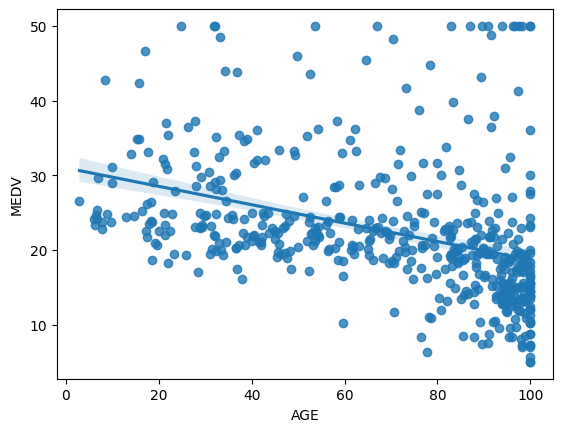

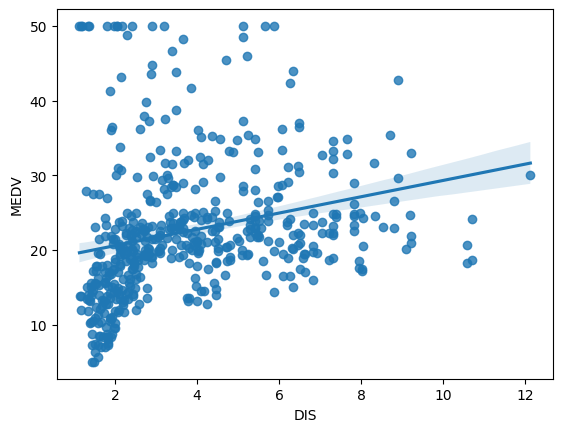

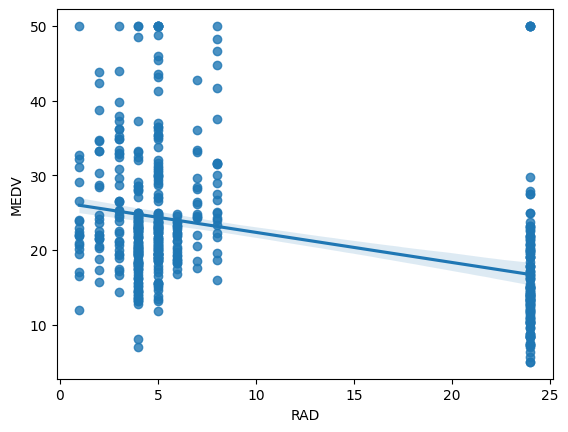

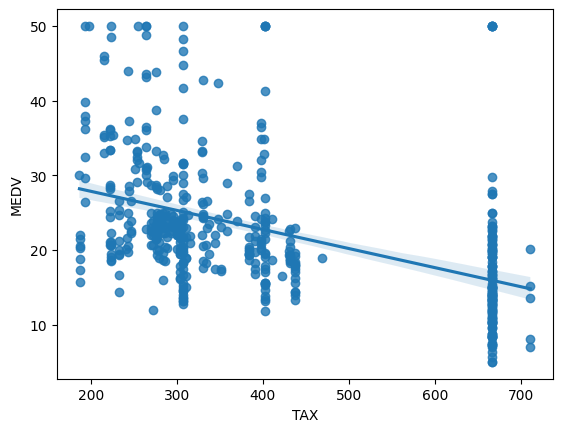

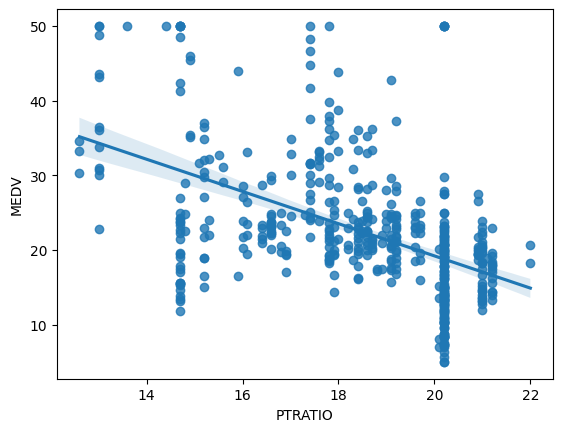

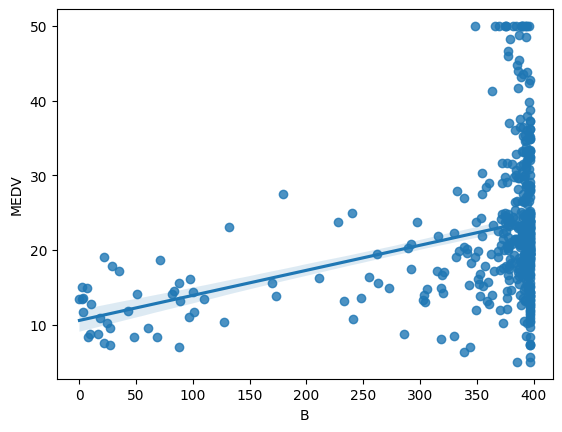

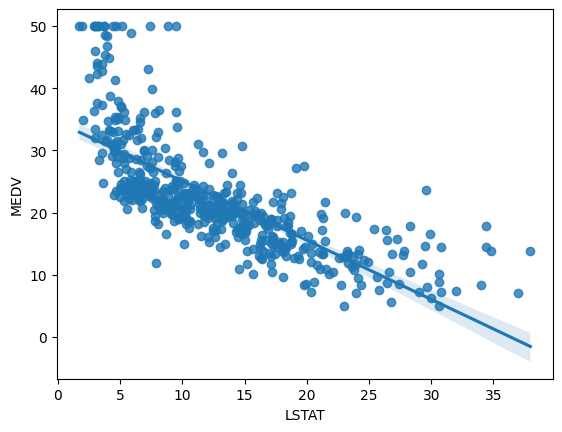

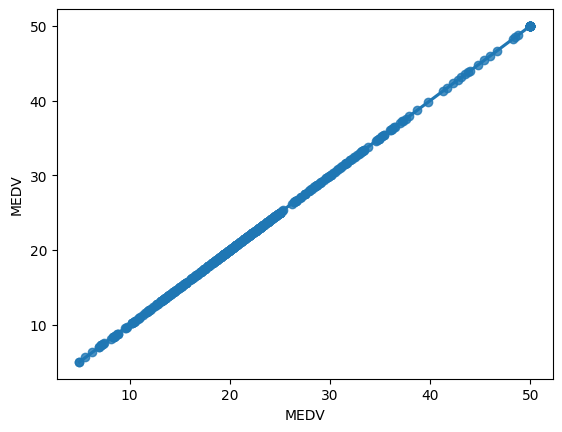

In [18]:
for cols in df.columns:
    sns.regplot(x=df[cols], y=df['MEDV'], data=df)
    plt.show()

In [20]:
## Linear regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [21]:
y_target = df['MEDV']
x_data = df.drop(['MEDV'], axis=1, inplace=False)

In [30]:
x_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [22]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_target, test_size=0.3, random_state=156)

In [25]:
x_train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000
mean,3.512029,11.040960,11.143164,0.062147,0.557208,6.284517,69.057345,3.773437,9.677966,408.774011,18.440395,355.358446,12.722260
std,7.659321,23.400725,6.834845,0.241764,0.117595,0.730184,28.239313,2.076662,8.729048,169.875975,2.189268,89.680144,7.293552
min,0.009060,0.000000,0.460000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,2.600000,1.730000
25%,0.085418,0.000000,5.190000,0.000000,0.453000,5.887250,45.450000,2.066825,4.000000,279.000000,17.400000,372.597500,6.877500
50%,0.290225,0.000000,8.560000,0.000000,0.538000,6.198500,79.500000,3.267450,5.000000,330.000000,19.100000,390.800000,11.395000
75%,3.689388,12.500000,18.100000,0.000000,0.631000,6.628750,94.100000,5.213925,24.000000,666.000000,20.200000,395.580000,16.717500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,21.200000,396.900000,37.970000


In [26]:
y_train.describe()

count    354.000000
mean      22.909887
std        9.479242
min        5.000000
25%       17.100000
50%       21.500000
75%       25.275000
max       50.000000
Name: MEDV, dtype: float64

In [46]:
## LinearRegression

In [61]:
lr = LinearRegression()

In [62]:
lr.fit(x_train, y_train)

LinearRegression()

In [63]:
y_pred = lr.predict(x_test)

In [64]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'MSE : {mse}')
print(f'RMSE : {rmse}')
print(f'R2 : {r2}')

MSE : 17.296915907902097
RMSE : 4.158956107955709
R2 : 0.7572263323138929


In [47]:
## Apply K fold

In [65]:
from sklearn.model_selection import cross_val_score

In [66]:
lr = LinearRegression()

In [67]:
neg_mse_scores = cross_val_score(lr, x_data, y_target, scoring='neg_mean_squared_error', cv=5)
neg_mse_scores

array([-12.46030057, -26.04862111, -33.07413798, -80.76237112,
       -33.31360656])

In [68]:
rmse_scores = np.sqrt(-1 * neg_mse_scores)
rmse_scores

array([3.52991509, 5.10378498, 5.75101191, 8.9867887 , 5.77179405])

In [69]:
avg_rmse = np.mean(rmse_scores)
avg_rmse

5.828658946215835

In [54]:
# Decision Tree

In [70]:
from sklearn.tree import DecisionTreeRegressor

In [71]:
tree = DecisionTreeRegressor()

In [72]:
tree.fit(x_train, y_train)

DecisionTreeRegressor()

In [73]:
y_pred = tree.predict(x_test)

In [74]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'MSE : {mse}')
print(f'RMSE : {rmse}')
print(f'R2 : {r2}')

MSE : 12.068947368421053
RMSE : 3.4740390568358688
R2 : 0.830604332394101


In [75]:
# Decision Tree + Grid serch

In [76]:
from sklearn.model_selection import GridSearchCV

In [78]:
tree = DecisionTreeRegressor()
grid_param = {'max_depth':[1,2,3,4,5,6],
              'min_samples_split':[2,3]
             }
grid_tree = GridSearchCV(tree, param_grid=grid_param, cv=3, refit=True)
grid_tree.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6],
                         'min_samples_split': [2, 3]})

In [80]:
scores_df = pd.DataFrame(grid_tree.cv_results_)
scores_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001016,1.555396e-05,0.001955,7.125963e-04,1,2,"{'max_depth': 1, 'min_samples_split': 2}",0.276430,0.392111,0.490261,0.386267,0.087394,11
1,0.001016,4.084936e-06,0.001181,2.321458e-04,1,3,"{'max_depth': 1, 'min_samples_split': 3}",0.276430,0.392111,0.490261,0.386267,0.087394,11
2,0.001013,1.917257e-06,0.001390,5.141788e-04,2,2,"{'max_depth': 2, 'min_samples_split': 2}",0.527047,0.618727,0.655747,0.600507,0.054098,8
3,0.001187,1.186090e-04,0.001361,4.658183e-04,2,3,"{'max_depth': 2, 'min_samples_split': 3}",0.527047,0.618727,0.655747,0.600507,0.054098,7
4,0.002000,4.052337e-07,0.002000,8.104673e-07,3,2,"{'max_depth': 3, 'min_samples_split': 2}",0.553254,0.531898,0.639833,0.574995,0.046669,10
5,0.001919,6.660087e-04,0.001134,8.815822e-05,3,3,"{'max_depth': 3, 'min_samples_split': 3}",0.553254,0.531898,0.639833,0.574995,0.046669,9
6,0.001407,5.358741e-04,0.001016,4.379308e-05,4,2,"{'max_depth': 4, 'min_samples_split': 2}",0.691307,0.762289,0.786335,0.746644,0.040342,1
7,0.001434,5.070596e-04,0.000732,5.210693e-04,4,3,"{'max_depth': 4, 'min_samples_split': 3}",0.661593,0.587127,0.786335,0.678352,0.082185,4
8,0.001353,4.718661e-04,0.001020,9.246899e-06,5,2,"{'max_depth': 5, 'min_samples_split': 2}",0.735184,0.585699,0.810354,0.710412,0.093373,2
9,0.001727,5.074858e-04,0.000679,4.800277e-04,5,3,"{'max_depth': 5, 'min_samples_split': 3}",0.590505,0.588447,0.816074,0.665009,0.106822,6


In [81]:
grid_tree.best_params_

{'max_depth': 4, 'min_samples_split': 2}

In [82]:
grid_tree.best_score_

0.7466437349435419

In [84]:
estimator = grid_tree.best_estimator_
y_pred = estimator.predict(x_test)

In [85]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'MSE : {mse}')
print(f'RMSE : {rmse}')
print(f'R2 : {r2}')

MSE : 10.027830356874532
RMSE : 3.1666749686184295
R2 : 0.8592527611491528
